# Movie Genre Classification 

In [1]:
# Task 1

# Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. 
# You can use techniques like TF-IDF or word embeddings with classifiers 
# such as Naive Bayes, Logistic Regression, or Support Vector Machines.

In [2]:
# Importing libraries

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy
from sklearn import linear_model
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import matplotlib as plt
from nltk.corpus import stopwords
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# Load training data
train_data = pd.read_csv(
    r"C:\Users\Michel Diego\Downloads\archive (8)\Genre Classification Dataset\train_data.txt",
    sep=':::', names=["Movie_name", "Genre", "Description"], engine='python'
)

train_data = train_data[:54200]


In [4]:
train_data.isnull().sum()

Movie_name     0
Genre          0
Description    0
dtype: int64

In [5]:
train_data.head(15)

,Movie_name,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
10,Spirits (2014/I),horror,Four high school students embark on a terrify...


In [6]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

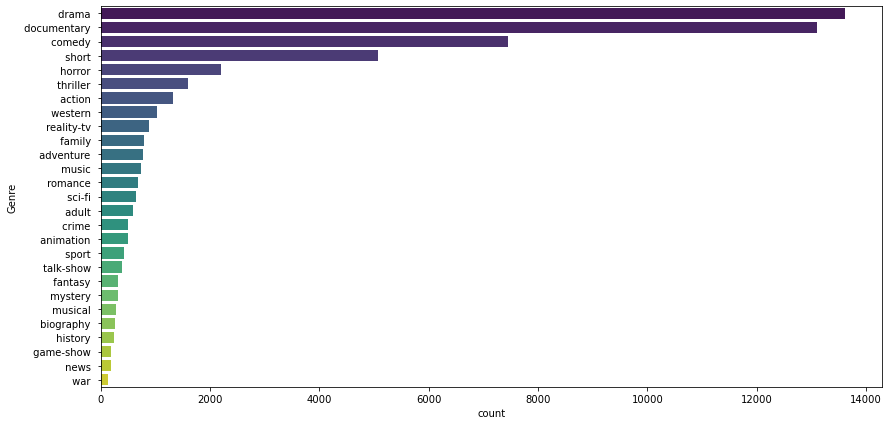

In [7]:
# Plot the distribution of genres in the training data

plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='Genre', order=train_data['Genre'].value_counts().index, palette='viridis')

plt.show()

In [8]:
train_data['Genre'].value_counts()

 drama           13611
 documentary     13093
 comedy           7445
 short            5072
 horror           2203
 thriller         1591
 action           1315
 western          1031
 reality-tv        884
 family            783
 adventure         775
 music             730
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           322
 mystery           319
 musical           277
 biography         265
 history           242
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

In [9]:
# Apply the preprocessing function to the 'Description' column train_data

train_data["Cleaned_Description"] = train_data["Description"].apply(clean_text)

train_data.head(15)

,Movie_name,Genre,Description,Cleaned_Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...,quality control consists series single take sh...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...,tough economic times max joey run ideas discov...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...,ron petrie keanu reeves troubled teen whose li...
9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss...",sudden calamitous event causing great loss lif...
10,Spirits (2014/I),horror,Four high school students embark on a terrify...,four high school students embark terrifying jo...


In [10]:
train_data['length_Text_cleaning']=train_data['Cleaned_Description'].apply(len)
train_data.head()

,Movie_name,Genre,Description,Cleaned_Description,length_Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...,383
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,119
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...,402
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...,745
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,films title refers recovered bodies ground zer...,402


In [11]:
# Filtering no further 2000 words in description movie

filt=train_data['length_Text_cleaning']>2000
train_data.drop(train_data[filt].index,axis=0,inplace=True) 

In [12]:
train_data.shape

(54000, 5)

In [13]:
# Loading dataset test

test_data = pd.read_csv(
    r"C:\Users\Michel Diego\Downloads\archive (8)\Genre Classification Dataset\test_data.txt",
    sep=':::', names=['Id', 'Title', 'Description'], engine='python'
)

In [14]:
# Apply the preprocessing function to the 'Description' column test_data

test_data["Cleaned_Description"] = test_data["Description"].apply(clean_text)

test_data.head(15)

,Id,Title,Description,Cleaned_Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,emily burns held captive room idea got determi...
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...,beautiful neglected wife brilliant architect m...
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...,vasu inamdar ina suffers disorder sees comes d...
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,insight tornados hit kensal rise birmingham su...
9,10,Press (2011),Press is a story of young people overwhelmed ...,press story young people overwhelmed social di...


In [15]:
# Creating lenght text column 

test_data['length_Text_cleaning']=test_data['Cleaned_Description'].apply(len)
test_data.head()

,Id,Title,Description,Cleaned_Description,length_Text_cleaning
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...,317
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,461
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,426
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...,430
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,561


In [16]:
# Excluding outliers

filt_test=test_data['length_Text_cleaning']>2000
test_data.drop(test_data[filt_test].index,axis=0,inplace=True) 

In [17]:
test_data = test_data[:54000]

In [18]:
# Initialize the TF-IDF vectorizer with more features 

vectorizer = TfidfVectorizer()
X_features = vectorizer.fit_transform(train_data["Cleaned_Description"])

# You can apply the same vectorizer to the test data

X_test_features = vectorizer.transform(test_data["Description"])


# Encode genres

label_encoder = LabelEncoder()
train_data["Encoded_Genre"] = label_encoder.fit_transform(train_data["Genre"])

# Split features and labels

y_train = train_data["Encoded_Genre"]


# Split the training dataset into training and validation subsets

X_train, X_val, y_train, y_val = train_test_split(
    X_features,  
    y_train,               
    test_size=0.2,                    
    random_state=42
)

In [19]:
# Train the Naive Bayes model using the split training data

model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)  


# Make predictions on the validation set

y_val_pred = model_nb.predict(X_val)

# Evaluate the model on the validation set

print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

# Make predictions on the test set

y_test_pred = model_nb.predict(X_test_features)

# Decode predictions and add them to the test data

test_data["Predicted_Genre_NB"] = label_encoder.inverse_transform(y_test_pred)


Validation Set Classification Report:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       239
       adult        0.00      0.00      0.00       118
   adventure        0.00      0.00      0.00       171
   animation        0.00      0.00      0.00        96
   biography        0.00      0.00      0.00        59
      comedy        0.59      0.03      0.06      1452
       crime        0.00      0.00      0.00        98
 documentary        0.53      0.89      0.66      2633
       drama        0.37      0.88      0.52      2668
      family        0.00      0.00      0.00       149
     fantasy        0.00      0.00      0.00        66
   game-show        0.00      0.00      0.00        38
     history        0.00      0.00      0.00        49
      horror        0.00      0.00      0.00       442
       music        0.00      0.00      0.00       166
     musical        0.00      0.00      0.00        49
     mystery        0.00  

C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Train the Random Forest model on the training subset

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the validation set

y_val_pred = model.predict(X_val)
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

# Make predictions on the test set

y_test_pred = model.predict(X_test_features)

# Decode predictions and add them to the test data

test_data["Predicted_Genre_RF"] = label_encoder.inverse_transform(y_test_pred)



Validation Set Classification Report:
               precision    recall  f1-score   support

      action        1.00      0.00      0.01       239
       adult        0.62      0.08      0.15       118
   adventure        0.64      0.05      0.10       171
   animation        0.00      0.00      0.00        96
   biography        0.00      0.00      0.00        59
      comedy        0.55      0.23      0.32      1452
       crime        1.00      0.01      0.02        98
 documentary        0.54      0.89      0.67      2633
       drama        0.40      0.85      0.55      2668
      family        1.00      0.02      0.04       149
     fantasy        0.00      0.00      0.00        66
   game-show        0.93      0.34      0.50        38
     history        0.00      0.00      0.00        49
      horror        0.80      0.10      0.17       442
       music        0.73      0.05      0.09       166
     musical        0.00      0.00      0.00        49
     mystery        0.00  

C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
# Train the Logistic Regression model on the training subset

model_logr = linear_model.LogisticRegression(max_iter=1000, random_state=42)
model_logr.fit(X_train, y_train)

# Evaluate the model on the validation set

y_val_pred = model_logr.predict(X_val)
print("Validation Set Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))

# Make predictions on the test set

y_test_pred = model_logr.predict(X_test_features)

# Decode predictions and add them to the test data

test_data["Predicted_Genre_LR"] = label_encoder.inverse_transform(y_test_pred)



Validation Set Classification Report:
               precision    recall  f1-score   support

      action        0.48      0.18      0.26       239
       adult        0.69      0.19      0.29       118
   adventure        0.68      0.09      0.16       171
   animation        0.80      0.04      0.08        96
   biography        0.00      0.00      0.00        59
      comedy        0.52      0.58      0.55      1452
       crime        0.00      0.00      0.00        98
 documentary        0.64      0.87      0.74      2633
       drama        0.52      0.80      0.63      2668
      family        0.22      0.01      0.03       149
     fantasy        0.00      0.00      0.00        66
   game-show        0.93      0.34      0.50        38
     history        0.00      0.00      0.00        49
      horror        0.71      0.55      0.62       442
       music        0.80      0.27      0.40       166
     musical        0.00      0.00      0.00        49
     mystery        0.00  

C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michel Diego\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Validation Confusion Matrix:


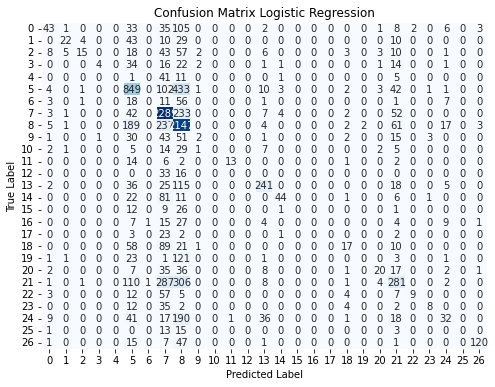

In [23]:
# Evaluate the model using the validation set
print("\nValidation Confusion Matrix:")

cmr_LR = confusion_matrix(y_val, y_val_pred)

# Ploting

plt.figure(figsize=(8,6))
sns.heatmap(cmr_LR, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Logistic Regression")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [24]:
#Ploting predictions distribution each model

data = pd.concat([test_data["Predicted_Genre_LR"],
                                test_data["Predicted_Genre_RF"],
                                test_data["Predicted_Genre_NB"]], axis=1)

In [25]:
test_data

,Id,Title,Description,Cleaned_Description,length_Text_cleaning,Predicted_Genre_NB,Predicted_Genre_RF,Predicted_Genre_LR
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...,317,drama,drama,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,461,drama,drama,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,426,documentary,documentary,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...,430,drama,drama,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,561,drama,drama,drama
...,...,...,...,...,...,...,...,...
54189,54190,Historien om Kim Skov (1981),The boy Kim moves with his family from the co...,boy kim moves family countryside ghetto big ci...,266,drama,drama,drama
54190,54191,"""House Invaders"" (1998)",House Invaders features a different home each...,house invaders features different home episode...,184,documentary,documentary,reality-tv
54191,54192,Eduardo Ducay. El cine que siempre estuvo ahí...,Visual documentary about the figure of produc...,visual documentary figure producer eduardo duc...,177,documentary,documentary,documentary
54192,54193,Dinosaurs Decoded (2009),National Geographic reviews Jack Horner's res...,national geographic reviews jack horners resea...,265,documentary,documentary,documentary


In [26]:
data.Predicted_Genre_LR.value_counts()

 drama           20704
 documentary     17566
 comedy           7937
 short            2950
 horror           1767
 western           729
 action            587
 thriller          363
 music             336
 reality-tv        220
 sci-fi            189
 adult             152
 adventure         138
 game-show          89
 talk-show          78
 sport              73
 family             72
 crime              15
 romance            13
 animation          12
 news                7
 musical             2
 fantasy             1
Name: Predicted_Genre_LR, dtype: int64

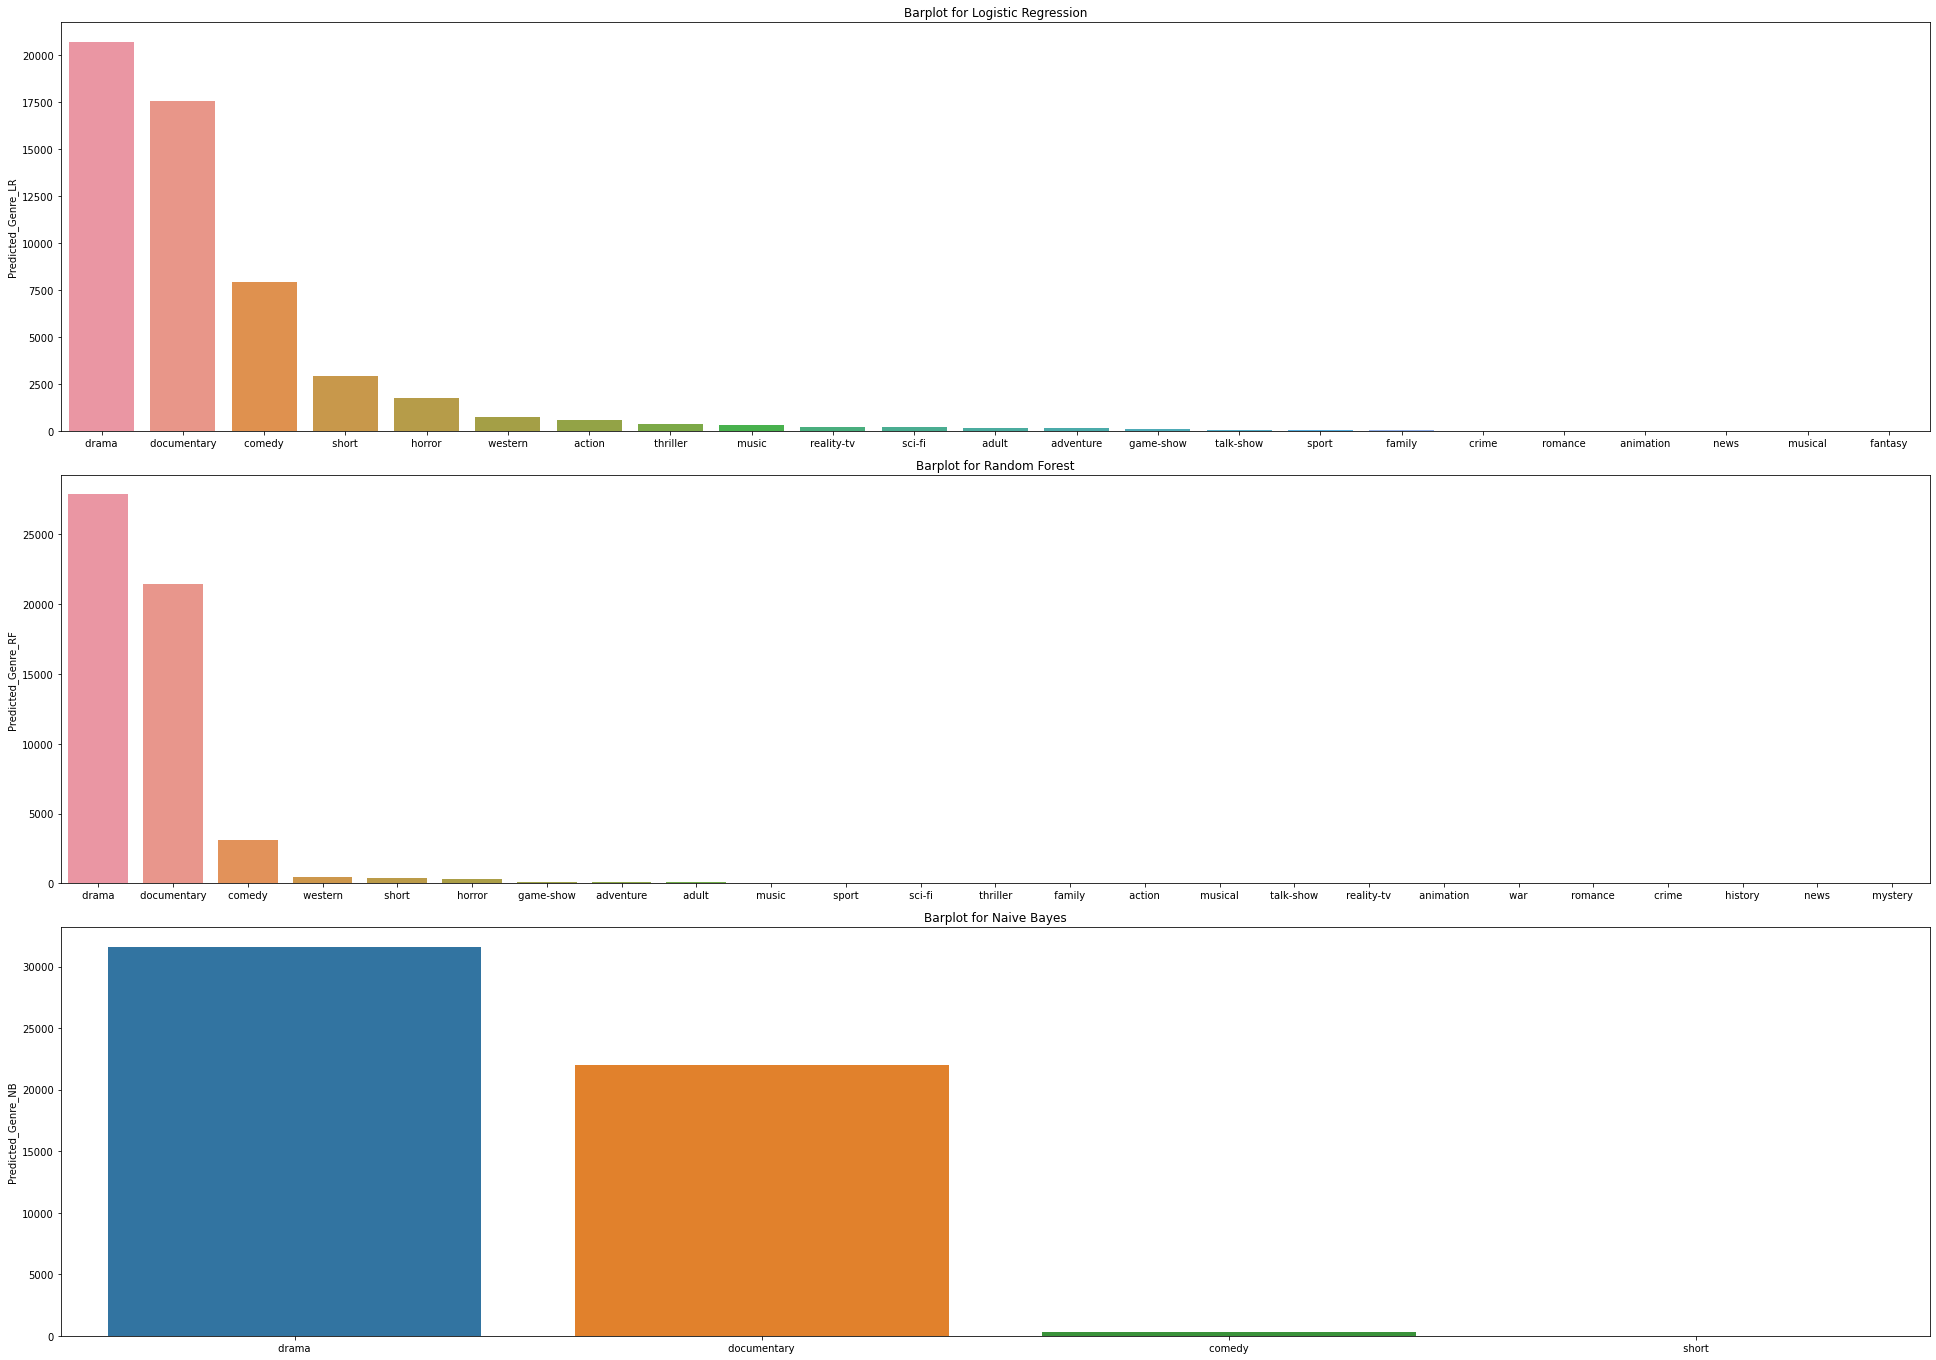

In [27]:
# Comparing the prediction distribuition

fig, axes = plt.subplots(3, 1, figsize=(27,19))

genre_counts_LR = test_data['Predicted_Genre_LR'].value_counts()
genre_counts_RF = test_data['Predicted_Genre_RF'].value_counts()
genre_counts_NB = test_data['Predicted_Genre_NB'].value_counts()

# Plot bar plots on each axis

sns.barplot(data=test_data, x=genre_counts_LR.index, y=genre_counts_LR, ax=axes[0])
sns.barplot(data=test_data, x=genre_counts_RF.index, y=genre_counts_RF, ax=axes[1])
sns.barplot(data=test_data, x=genre_counts_NB.index, y=genre_counts_NB, ax=axes[2])

# Set titles for each subplot

axes[0].set_title('Barplot for Logistic Regression')
axes[1].set_title('Barplot for Random Forest')
axes[2].set_title('Barplot for Naive Bayes')

plt.tight_layout()

plt.show()

In [29]:
# Load training data

test_data_solution = pd.read_csv(
    r"C:\Users\Michel Diego\Downloads\archive (8)\Genre Classification Dataset\test_data_solution.txt",
    sep=':::', names=["Movie_name", "Genre", "Description"], engine='python'
)

test_data_solution = test_data_solution[:54200]

In [30]:
test_data_solution

,Movie_name,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [31]:
test_data_new = pd.concat([test_data, test_data_solution['Genre']], axis=1)

In [35]:
test_data_new.isnull().sum()

Id                      201
Title                   201
Description             201
Cleaned_Description     201
length_Text_cleaning    201
Predicted_Genre_NB      201
Predicted_Genre_RF      201
Predicted_Genre_LR      201
Genre                     1
dtype: int64

In [36]:
test_data_new.dropna(inplace=True)

In [37]:
test_data_new

,Id,Title,Description,Cleaned_Description,length_Text_cleaning,Predicted_Genre_NB,Predicted_Genre_RF,Predicted_Genre_LR,Genre
1,2.0,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,461.0,drama,drama,drama,thriller
2,3.0,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...,426.0,documentary,documentary,documentary,comedy
3,4.0,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...,430.0,drama,drama,drama,documentary
4,5.0,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...,561.0,drama,drama,drama,drama
5,6.0,Riddle Room (2016),Emily Burns is being held captive in a room w...,emily burns held captive room idea got determi...,163.0,drama,drama,drama,drama
...,...,...,...,...,...,...,...,...,...
54189,54190.0,Historien om Kim Skov (1981),The boy Kim moves with his family from the co...,boy kim moves family countryside ghetto big ci...,266.0,drama,drama,drama,short
54190,54191.0,"""House Invaders"" (1998)",House Invaders features a different home each...,house invaders features different home episode...,184.0,documentary,documentary,reality-tv,drama
54191,54192.0,Eduardo Ducay. El cine que siempre estuvo ahí...,Visual documentary about the figure of produc...,visual documentary figure producer eduardo duc...,177.0,documentary,documentary,documentary,documentary
54192,54193.0,Dinosaurs Decoded (2009),National Geographic reviews Jack Horner's res...,national geographic reviews jack horners resea...,265.0,documentary,documentary,documentary,documentary
